## Notebook - Dados Covid-19 Paty do Alferes

In [1]:
import pandas as pd
import plotly.offline as py
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime,timedelta
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats as sps
from scipy.interpolate import interp1d

#from IPython.display import clear_output


py.init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('../../../Dados_paty.csv')

In [3]:
data.head(50)

,Data,Suspeitos,Confirmados,Descartados,Obitos,Novos Suspeitos,Internados,Curados
0,23/03/20,16,0,0,0,NaN,NaN,NaN
1,25/03/20,13,0,3,0,0.0,NaN,NaN
2,26/03/20,12,0,4,0,0.0,NaN,NaN
3,27/03/20,10,0,6,0,0.0,NaN,NaN
4,31/03/20,11,0,6,0,1.0,NaN,NaN
5,01/04/20,8,0,9,0,0.0,NaN,NaN
6,02/04/20,7,0,10,0,0.0,NaN,NaN
7,03/04/20,8,0,10,0,1.0,NaN,NaN
8,06/04/20,6,0,13,0,1.0,NaN,NaN
9,08/04/20,10,0,14,0,5.0,NaN,NaN


In [4]:
trace = go.Scatter(x = data['Data'],
                   y = data['Confirmados'],
                   mode = 'lines')
dat = [trace]
py.iplot(dat)

In [5]:
trace = go.Bar(x = data['Data'],
               y = data['Novos Suspeitos'],
               offsetgroup=0)

layout = go.Layout(
        title = '<b>Novos Casos Suspeitos Diários</b>',
        paper_bgcolor='rgba(0,0,50,0.025)',
        plot_bgcolor='rgba(0,0,50,0.025)')

dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig)

In [6]:
data2 = data.set_index('Data')

fig = data2[['Confirmados']].iplot(asFigure=True, kind='scatter',
               xTitle='Dates',
               yTitle='Número de Casos',
               title='Casos Confirmados em Paty do Alferes (COVID-19)',                                
               vspan={'x0':'08/06/20','x1':data2.iloc[-1].name,
               'color':'rgba(0,0,50,0.3)','fill':True,'opacity':.3})

fig.update_layout(
    showlegend=False,
    annotations=[
        dict(
            x=data2.iloc[-1].name,
            y=data2['Confirmados'].iloc[-1],
            xref="x",
            yref="y",
            text="<b>" + str(data2['Confirmados'].iloc[-1]) + " casos confirmados em " + str(data2.iloc[-1].name) + "<b>",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)


fig['data'][0]['line'] = {
    'color': 'rgba(63, 63, 190, 1.0)', 'dash': 'solid', 'shape': 'linear', 'width': 3.0
}

iplot(fig)

In [7]:

[datetime.strptime(x, '%d/%m/%y') for x in data['Data'].values][-1].strftime("%V")

soma_confirmados_semanal = pd.DataFrame(columns=['Semana', 'Casos'])

convert = lambda date: datetime.strptime(date, '%d/%m/%y')

for i in range(len(data) ):
    
    data_atual = convert(data['Data'].values[i])
    
    semana = data_atual.strftime("%V")
    
    conta_casos = data['Confirmados'][i]
    
    soma_confirmados_semanal.loc[i] = [semana] + [conta_casos]
    
    
    
soma_confirmados_semanal['Novos Casos'] = soma_confirmados_semanal['Casos'].diff().fillna(soma_confirmados_semanal['Casos'].iloc[0])




In [8]:
soma_confirmados_semanal.head()

,Semana,Casos,Novos Casos
0,13,0,0
1,13,0,0
2,13,0,0
3,13,0,0
4,14,0,0


In [9]:
soma_confirmados_semanal_consolidado  = soma_confirmados_semanal[['Semana','Novos Casos']].groupby('Semana').sum()

In [10]:
def transform_week(x):

    d = '2020-W'+str(x)
    start = datetime.strptime(d + '-1', '%G-W%V-%u')

    end = start + timedelta(6)

    start = start.strftime("%d/%m/%Y")

    end =  end.strftime("%d/%m/%Y")

    return start + " - " + end



In [11]:
soma_confirmados_semanal_consolidado['Semana_str'] = [transform_week(int(x)) for x in soma_confirmados_semanal_consolidado.index]

In [12]:
soma_confirmados_semanal_consolidado.head()

,Novos Casos,Semana_str
Semana,,
13,0,23/03/2020 - 29/03/2020
14,0,30/03/2020 - 05/04/2020
15,2,06/04/2020 - 12/04/2020
16,0,13/04/2020 - 19/04/2020
17,0,20/04/2020 - 26/04/2020


In [13]:
bar_soma_casos_semanais = go.Bar(x = soma_confirmados_semanal_consolidado['Semana_str'],
               y = soma_confirmados_semanal_consolidado['Novos Casos'],
               offsetgroup=0)

layout = go.Layout(
        title = '<b>Novos Casos Confirmados (por semana)</b>',
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
)

dat_soma_casos = [bar_soma_casos_semanais]
fig = go.Figure(data=dat_soma_casos, layout=layout)
py.iplot(fig)

# Pirâmide etária dos contaminados pela COVID-19 em Paty do Alferes

In [14]:
dados_contaminados_paty = pd.read_csv('../../../Contaminados_paty.csv')

dados_obitos_paty = pd.read_csv('../../../Obitos_paty.csv')

In [15]:
dados_contaminados_paty

,Sexo,Idade,Bairro
0,Feminino,38,NaN
1,Feminino,53,NaN
2,Masculino,74,NaN
3,Feminino,26,NaN
4,Feminino,33,NaN
...,...,...,...
71,Feminino,30,NaN
72,Feminino,45,NaN
73,Masculino,54,NaN
74,Feminino,23,NaN


In [16]:
dados_obitos_paty.head()

,Sexo,Idade,Bairro
0,Masculino,67,Arcozelo
1,Masculino,70,Acampamento
2,Feminino,77,Arcozelo
3,Masculino,62,Lameirão
4,Masculino,77,Pedras Ruivas


In [17]:
mulheres_contaminadas_paty = dados_contaminados_paty[dados_contaminados_paty['Sexo'] == "Feminino"][['Idade']]

In [18]:
mulheres_contaminadas_paty.head()

,Idade
0,38
1,53
3,26
4,33
7,58


In [19]:
homens_contaminados_paty = dados_contaminados_paty[dados_contaminados_paty['Sexo']=='Masculino'][['Idade']]

In [20]:
homens_contaminados_paty.head()

,Idade
2,74
5,35
6,34
8,38
9,81


In [21]:
mulheres_obito_paty = dados_obitos_paty[dados_obitos_paty['Sexo']=='Feminino'][['Idade']]

In [22]:
mulheres_obito_paty.head()

,Idade
2,77


In [23]:
homens_obito_paty = dados_obitos_paty[dados_obitos_paty['Sexo']=='Masculino'][['Idade']]

In [24]:
homens_obito_paty.head()

,Idade
0,67
1,70
3,62
4,77


In [25]:
intervalo_idade = np.arange(0,110,10)

mulheres_contaminadas_paty_cons = mulheres_contaminadas_paty.groupby(pd.cut(mulheres_contaminadas_paty.Idade, intervalo_idade)).count()

homens_contaminadas_paty_cons = homens_contaminados_paty.groupby(pd.cut(homens_contaminados_paty.Idade, intervalo_idade)).count()

mulheres_obito_paty_cons = mulheres_obito_paty.groupby(pd.cut(mulheres_obito_paty.Idade, intervalo_idade)).count()

homens_obito_paty_cons = homens_obito_paty.groupby(pd.cut(homens_obito_paty.Idade, intervalo_idade)).count()

In [27]:
mulheres_contaminadas_paty_cons.head()

,Idade
Idade,
"(0, 10]",1
"(10, 20]",1
"(20, 30]",9
"(30, 40]",13
"(40, 50]",5


In [28]:
homens_contaminadas_paty_cons.head()

,Idade
Idade,
"(0, 10]",0
"(10, 20]",1
"(20, 30]",2
"(30, 40]",8
"(40, 50]",5


In [29]:
mulheres_obito_paty_cons.head()

,Idade
Idade,
"(0, 10]",0
"(10, 20]",0
"(20, 30]",0
"(30, 40]",0
"(40, 50]",0


In [30]:
homens_obito_paty_cons.head()

,Idade
Idade,
"(0, 10]",0
"(10, 20]",0
"(20, 30]",0
"(30, 40]",0
"(40, 50]",0


In [31]:

        a = 0.55
        b = 9.5
        c = -0.5

        yidx = np.arange(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=-1*mulheres_contaminadas_paty_cons.to_numpy().flatten(),
                            y=yidx,
                            orientation='h',
                            name='Mulheres',
                            width=1,
                            customdata=-1*mulheres_contaminadas_paty_cons.to_numpy().flatten(),
                            hovertemplate = "%{customdata}",
                            marker=dict(color='cornflowerblue')
                            ))

        fig.add_trace(go.Bar(x= homens_contaminadas_paty_cons.to_numpy().flatten(),
                            y= yidx,
                            orientation='h',
                            width=1,
                            name= 'Homens',
                            hovertemplate="%{x}",
                            marker=dict(color='lightblue')))  
        fig.add_scatter(x=[-a, a, a, -a],
                        y= [b, b, c, c], fill='toself',
                        mode='lines',
                        fillcolor='white' , line_color='white',
                        showlegend=False,
                        )
        fig.add_scatter(x= [0 ]*10,
                        y=yidx,
                        text=["0-10 ","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"],
                        mode='text',
                        showlegend=False,
                        )

        fig.add_trace( go.Bar(y=yidx,
                    x=homens_obito_paty_cons.to_numpy().flatten(),
                    orientation='h',
                    hoverinfo='x',
                    name= "Óbitos",
                    showlegend=True,
                    opacity=0.6,
                    marker=dict(color='black')
                    ))

        fig.add_trace(go.Bar(y=yidx,
                    x= -1 * mulheres_obito_paty_cons.to_numpy().flatten(),
                    orientation='h',
                    text= mulheres_obito_paty_cons.to_numpy().flatten().astype('int'),
                    hoverinfo='text',
                    showlegend=False,
                    opacity=0.6,
                    marker=dict(color='black')
                    ))

        fig.update_layout(barmode='overlay', 
                        autosize=True,
                        #height=500, 
                        #width=800, 
                        #yaxis_autorange='reversed',
                        yaxis_visible=False,
                        bargap=0.1,
                        paper_bgcolor='rgba(0,0,0,0)',
                        plot_bgcolor='rgba(0,0,0,0)'
                        )

        fig.update_layout(
            xaxis = dict(
                #tickmode = 'array',
                tickvals = [min(-1 * mulheres_contaminadas_paty_cons.to_numpy().flatten()),-10,-5,0,5,str(max(homens_contaminadas_paty_cons.to_numpy().flatten()))],
                ticktext = [str(max(mulheres_contaminadas_paty_cons.to_numpy().flatten())),'10','5','0','5',str(max(homens_contaminadas_paty_cons.to_numpy().flatten()))]
            )
        )

        #plot(fig, include_plotlyjs=True)

# Cálculo do valor $R_{t}$

In [ ]:
def prepara_casos(data, cutoff=25):
    
    novos_casos = data[["Confirmados"]].diff()
    
    
    

In [116]:
novos_casos = pd.Series(data.Confirmados.values, index=data.Data)

In [117]:
smoothed = novos_casos.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()

In [126]:
cutoff=1

idx_start = np.searchsorted(smoothed.values.flatten(), cutoff)
    


In [127]:
idx_start

9

In [128]:
smoothed = smoothed.iloc[idx_start:]

original = novos_casos.loc[smoothed.index]

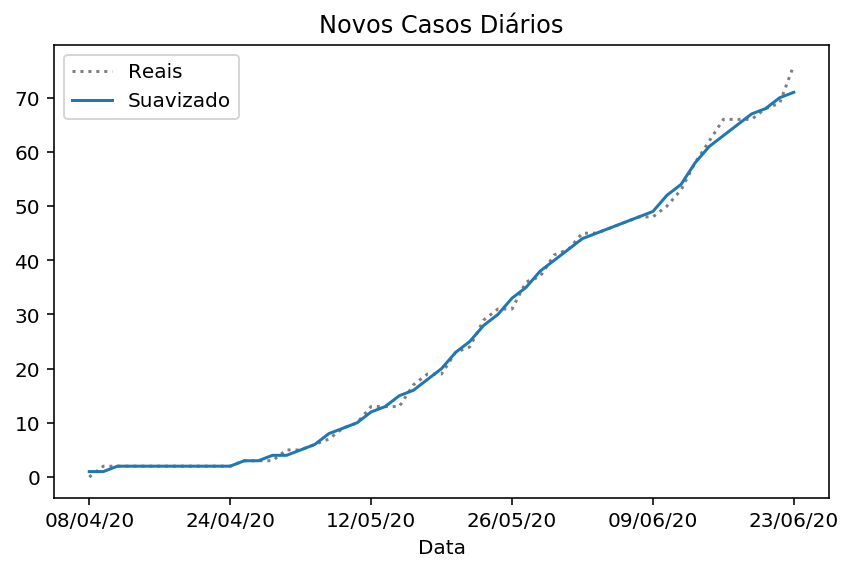

In [129]:
original.plot(title= "Novos Casos Diários",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Reais',
               legend=True,
             figsize=(500/72, 300/72))

ax = smoothed.plot(label='Suavizado',
                   legend=True)


ax.get_figure().set_facecolor('w')

Since $P(k)=P(k_0,k_1,\ldots,k_t)=P(k_0)P(k_1)\ldots P(k_t)$ we need to define $P(k_t)$. It turns out this is the denominator of Bayes rule:
$$P(R_t|k_t) = \frac{P(k_t|R_t)P(R_t)}{P(k_t)}$$

In [133]:
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

GAMMA = 1/7

def get_posteriors(sr, sigma=0.15):

    # (1) Calculate Lambda
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    
    # (2) Calculate each day's likelihood
    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])
    
    # (3) Create the Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None]) 

    # (3a) Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)
    
    # (4) Calculate the initial prior
    #prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 = np.ones_like(r_t_range)/len(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )
    
    # We said we'd keep track of the sum of the log of the probability
    # of the data for maximum likelihood calculation.
    log_likelihood = 0.0

    # (5) Iteratively apply Bayes' rule
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        #(5a) Calculate the new prior
        current_prior = process_matrix @ posteriors[previous_day]
        
        #(5b) Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior
        
        #(5c) Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)
        
        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator
        
        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)
    
    return posteriors, log_likelihood

# Note that we're fixing sigma to a value just for the example
posteriors, log_likelihood = get_posteriors(smoothed, sigma=.25)


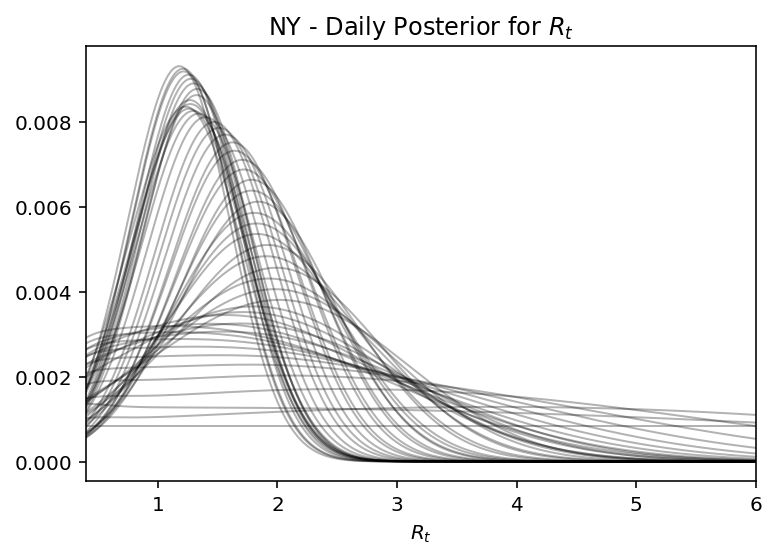

In [134]:
ax = posteriors.plot(title=f'{state_name} - Daily Posterior for $R_t$',
           legend=False, 
           lw=1,
           c='k',
           alpha=.3,
           xlim=(0.4,6))

ax.set_xlabel('$R_t$');

In [137]:
def highest_density_interval(pmf, p=.9, debug=False):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf],
                            index=pmf.columns)
    
    cumsum = np.cumsum(pmf.values)
    
    # N x N matrix of total probability mass for each low, high
    total_p = cumsum - cumsum[:, None]
    
    # Return all indices with total_p > p
    lows, highs = (total_p > p).nonzero()
    
    # Find the smallest range (highest density)
    best = (highs - lows).argmin()
    
    low = pmf.index[lows[best]]
    high = pmf.index[highs[best]]
    
    return pd.Series([low, high],
                     index=[f'Low_{p*100:.0f}',
                            f'High_{p*100:.0f}'])

In [138]:
# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors, p=.9)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)

result.tail()

,ML,Low_90,High_90
Data,,,
18/06/20,1.28,0.50,1.96
19/06/20,1.26,0.52,1.96
20/06/22,1.22,0.46,1.89
22/06/20,1.21,0.46,1.88
23/06/20,1.18,0.43,1.84


AttributeError: 'str' object has no attribute 'toordinal'

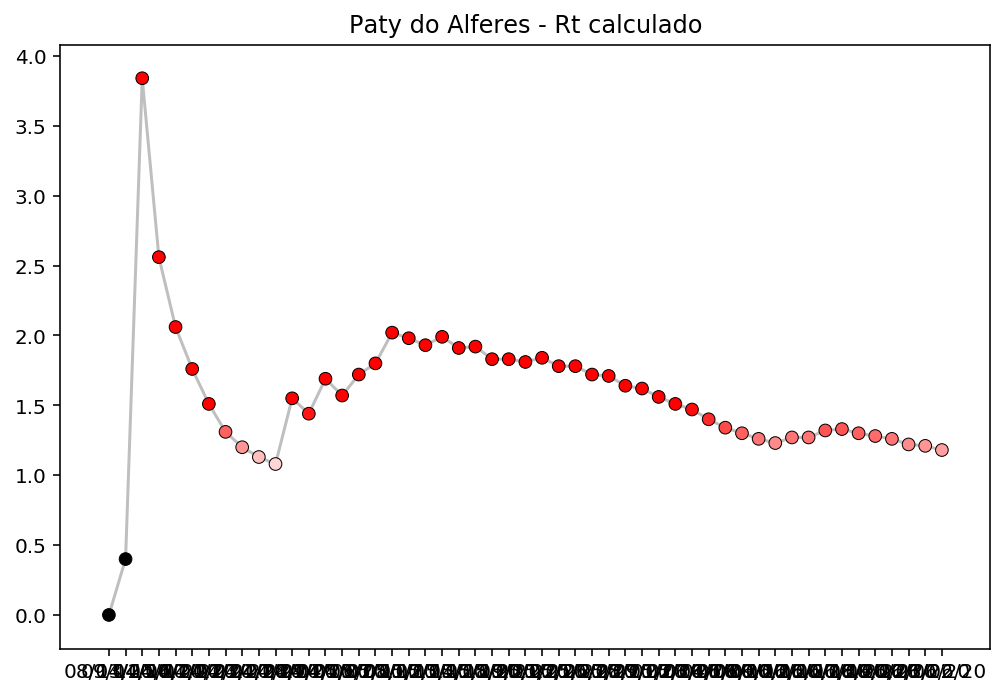

In [159]:
def plot_rt(result, ax, state_name):
    
    ax.set_title("Paty do Alferes - Rt calculado")
    
    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5
    
    index = result['ML'].index.get_level_values('Data')
    values = result['ML'].values
    
    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)
    
    # Aesthetically, extrapolate credible interval by 1 day either side
    lowfn = interp1d(date2num(index),
                     result['Low_90'].values,
                     bounds_error=False,
                     fill_value='extrapolate')
    
    highfn = interp1d(date2num(index),
                      result['High_90'].values,
                      bounds_error=False,
                      fill_value='extrapolate')
    
    extended = pd.date_range(start=pd.Timestamp('2020-03-23'),
                             end=index[-1]+pd.Timedelta(days=1))
    
    ax.fill_between(extended,
                    lowfn(date2num(extended)),
                    highfn(date2num(extended)),
                    color='k',
                    alpha=.1,
                    lw=0,
                    zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25);
    
    # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(0.0, 5.0)
    ax.set_xlim(pd.Timestamp('2020-03-23'), result.index.get_level_values('date')[-1]+pd.Timedelta(days=1))
    fig.set_facecolor('w')

    
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(result, ax, state_name)
ax.set_title(f'Real-time $R_t$ for {state_name}')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [146]:
result['ML'].values

array([0.  , 0.4 , 3.84, 2.56, 2.06, 1.76, 1.51, 1.31, 1.2 , 1.13, 1.08,
       1.55, 1.44, 1.69, 1.57, 1.72, 1.8 , 2.02, 1.98, 1.93, 1.99, 1.91,
       1.92, 1.83, 1.83, 1.81, 1.84, 1.78, 1.78, 1.72, 1.71, 1.64, 1.62,
       1.56, 1.51, 1.47, 1.4 , 1.34, 1.3 , 1.26, 1.23, 1.27, 1.27, 1.32,
       1.33, 1.3 , 1.28, 1.26, 1.22, 1.21, 1.18])

In [155]:
ax.set_title(f"{state_name}")
    
    # Colors
ABOVE = [1,0,0]
MIDDLE = [1,1,1]
BELOW = [0,0,0]
cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
color_mapped = lambda y: np.clip(y, .5, 1.5)-.5


index = result['ML'].index.get_level_values('Data')
values = result['ML'].values
    
    # Plot dots and line
ax.plot(index, values, c='k', zorder=1, alpha=.25)
ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)


AttributeError: 'str' object has no attribute 'toordinal'

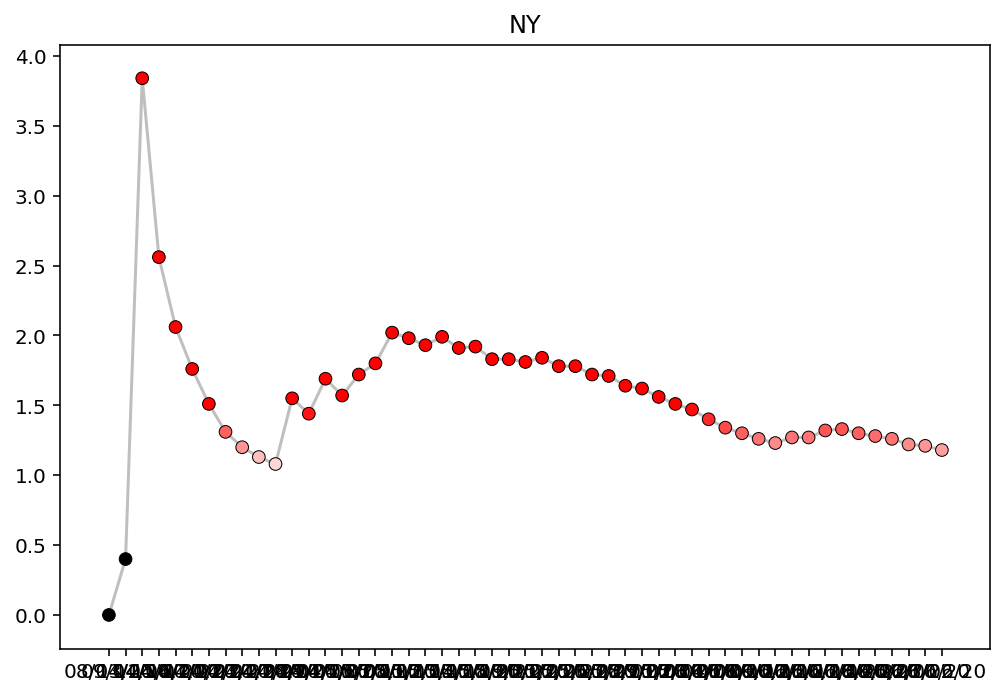

In [156]:
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(result, ax, state_name)